<a href="https://colab.research.google.com/github/miguelangel18241/NLP/blob/main/Dogs_Cats_Assessment2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PRESENTED BY MIGUEL ANGEL ZORRILLA PUERTAS
STUDENT ID A00061777

BASED ON:Luciano, S. (n.d.). Convolutional neural networks

You must include instructions on how to run your code at the top of your main source code file inside a comment block.

In [ ]:
# All my code has been done in GoogleColab
# You just have to upload the same Zipped File provided in the assessment.

# https://www.kaggle.com/c/dogs-vs-cats <- DATA

# I have created 2 Datasets:

    # One with the training Zipped file called: uploaded_train which contains all the pictures of cats and dogs (Please upload here only the training data)
    # One with the testing Zipped file called: uploaded_test which contains all the pictures of cats and dogs (Please upload here only the test data)
      # the testing data expects the files to have either cat. or dog.
        #Example: cat.1.jpg / dog.1.jpg

    # Cats and dogs will be handled as cat. and dog.

In [ ]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import zipfile
from collections import defaultdict
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import files

In [ ]:
from google.colab import files
import zipfile
import os
import glob
from PIL import Image
import numpy as np

# Define the image size
IMG_SIZE = (94, 125)

def pixels_from_path(file_path):
    im = Image.open(file_path)
    im = im.resize(IMG_SIZE)
    np_im = np.array(im)
    return np_im


In [ ]:

# Upload the training and test zip files
uploaded_train = files.upload()
uploaded_test = files.upload()


Saving train_Small_dataSet.zip to train_Small_dataSet (4).zip


Saving test_Small_dataSet.zip to test_Small_dataSet (4).zip


In [ ]:

# Define directories
train_dir = '/content/train'
test_dir = '/content/test'

# Create directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Unzip training data
train_zip = next(iter(uploaded_train))
with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

# Unzip testing data
test_zip = next(iter(uploaded_test))
with zipfile.ZipFile(test_zip, 'r') as zip_ref:
    zip_ref.extractall(test_dir)

# Check the contents of the directories
print("Contents of train directory:", os.listdir(train_dir))
print("Contents of test directory:", os.listdir(test_dir))

# Define path to the training dataset
train_data_dir = os.path.join(train_dir, 'train_Small_dataSet')

# List all image files in the training directory
all_image_paths = glob.glob(os.path.join(train_data_dir, '*'))
SAMPLE_SIZE = 200  # Adjust this based on how many images you want to process

# Filter and load training images for cats and dogs
cat_image_paths = [path for path in all_image_paths if 'cat.' in os.path.basename(path)]
dog_image_paths = [path for path in all_image_paths if 'dog.' in os.path.basename(path)]
cat_train_set = np.asarray([pixels_from_path(cat) for cat in cat_image_paths[:SAMPLE_SIZE]])
dog_train_set = np.asarray([pixels_from_path(dog) for dog in dog_image_paths[:SAMPLE_SIZE]])

# Combine and label data
x_train = np.concatenate([cat_train_set, dog_train_set])
labels_train = np.array([1] * len(cat_train_set) + [0] * len(dog_train_set)).reshape(-1, 1)

# Output data shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", labels_train.shape)

# Load and label validation images based on prefixes in filenames
valid_data_dir = os.path.join(test_dir, 'test_Small_dataSet')

# List all image files in the validation directory
valid_image_paths = glob.glob(os.path.join(valid_data_dir, '*'))

# Load validation images
x_valid = np.asarray([pixels_from_path(path) for path in valid_image_paths])

# Create labels for validation dataset (using 'cat.' and 'dog.' in filenames)
labels_valid = np.array([1 if 'cat.' in path else 0 for path in valid_image_paths]).reshape(-1, 1)

# Output validation data shapes
print("Validation data shape:", x_valid.shape)
print("Validation labels shape:", labels_valid.shape)


Contents of train directory: ['train_Small_dataSet', '__MACOSX']
Contents of test directory: ['__MACOSX', 'test_Small_dataSet']
Training data shape: (142, 125, 94, 3)
Training labels shape: (142, 1)
Validation data shape: (20, 125, 94, 3)
Validation labels shape: (20, 1)


[link text](https://)**<h1>Run of the Mill MLP**


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the MLP model
inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
x = layers.Flatten(name='flattened_img')(inputs)
x = layers.Dense(512, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model_mlp = keras.Model(inputs=inputs, outputs=outputs)

model_mlp.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss="binary_crossentropy",
                  metrics=["binary_accuracy"])

# Train the model
model_mlp.fit(x_train, labels_train, batch_size=32, shuffle=True, epochs=10, validation_data=(x_valid, labels_valid))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 397ms/step - binary_accuracy: 0.4397 - loss: 9397.9375 - val_binary_accuracy: 0.3000 - val_loss: 4282.7158
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 406ms/step - binary_accuracy: 0.5182 - loss: 2082.0259 - val_binary_accuracy: 0.7000 - val_loss: 405.0888
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 600ms/step - binary_accuracy: 0.4889 - loss: 648.6335 - val_binary_accuracy: 0.3000 - val_loss: 390.8800
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - binary_accuracy: 0.5406 - loss: 182.4681 - val_binary_accuracy: 0.7000 - val_loss: 157.1762
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step - binary_accuracy: 0.4128 - loss: 246.5618 - val_binary_accuracy: 0.3000 - val_loss: 106.8407
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - binary_accuracy: 0.5991 - loss: 151.8406 - val_binary_accuracy: 0.5000 - val_loss: 38.8045
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - binary_accuracy: 0.5733 - loss: 140.1269 - val_binary_accuracy: 0.6000 - val_loss:

In [ ]:
# Single CNN
inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
x = layers.Conv2D(32, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten(name='flattened_features')(x)
x = layers.Dense(128, activation='relu', name='first_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model_single_conv = keras.Model(inputs=inputs, outputs=outputs)

model_single_conv.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-6),
                          loss="binary_crossentropy",
                          metrics=["binary_accuracy"])

# Train the model
model_single_conv.fit(x_train, labels_train, batch_size=32, shuffle=True, epochs=10, validation_data=(x_valid, labels_valid))


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - binary_accuracy: 0.5109 - loss: 20.9501 - val_binary_accuracy: 0.6000 - val_loss: 8.4623
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - binary_accuracy: 0.4915 - loss: 11.0799 - val_binary_accuracy: 0.3000 - val_loss: 15.9391
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - binary_accuracy: 0.4911 - loss: 12.8387 - val_binary_accuracy: 0.6000 - val_loss: 7.5766
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 412ms/step - binary_accuracy: 0.5093 - loss: 7.9611 - val_binary_accuracy: 0.7000 - val_loss: 7.8069
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - binary_accuracy: 0.5069 - loss: 8.3284 - val_binary_accuracy: 0.6000 - val_loss: 6.7550
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - binary_accuracy: 0.4867 - loss: 7.4907 - val_binary_accuracy: 0.4000 - val_loss: 9.0960
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 399ms/step - binary_accuracy: 0.5251 - loss: 6.8258 - val_binary_accuracy: 0.4000 - val_loss: 7.0543
Epoch 8/10
5/5 ━

In [ ]:
# Bigger CN
inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
x = layers.Conv2D(48, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(48, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten(name='flattened_features')(x)
x = layers.Dense(256, activation='relu', name='first_layer')(x)
x = layers.Dense(256, activation='relu', name='second_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model_bigger = keras.Model(inputs=inputs, outputs=outputs)

model_bigger.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-6),
                     loss="binary_crossentropy",
                     metrics=["binary_accuracy"])

# Train the model
model_bigger.fit(x_train, labels_train, batch_size=64, shuffle=True, epochs=15, validation_data=(x_valid, labels_valid))


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - binary_accuracy: 0.5195 - loss: 15.0025 - val_binary_accuracy: 0.3000 - val_loss: 15.6667
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 792ms/step - binary_accuracy: 0.4945 - loss: 11.0963 - val_binary_accuracy: 0.3000 - val_loss: 10.2762
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 852ms/step - binary_accuracy: 0.4730 - loss: 7.4929 - val_binary_accuracy: 0.4000 - val_loss: 6.2074
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - binary_accuracy: 0.4789 - loss: 4.6985 - val_binary_accuracy: 0.4000 - val_loss: 4.7302
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 829ms/step - binary_accuracy: 0.5297 - loss: 3.4669 - val_binary_accuracy: 0.6000 - val_loss: 4.8978
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 786ms/step - binary_accuracy: 0.5504 - loss: 3.7066 - val_binary_accuracy: 0.6000 - val_loss: 4.9965
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - binary_accuracy: 0.5579 - loss: 3.9255 - val_binary_accuracy: 0.6000 - val_loss: 4.7656
Epoch 8/15
3/3 ━━━━━━━━━━

In [ ]:
# Huge Model
# Define an even larger convolutional model
inputs = keras.Input(shape=(IMG_SIZE[1], IMG_SIZE[0], 3), name='ani_image')
x = layers.Conv2D(128, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(128, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten(name='flattened_features')(x)
x = layers.Dense(256, activation='relu', name='first_layer')(x)
x = layers.Dense(256, activation='relu', name='second_layer')(x)
outputs = layers.Dense(1, activation='sigmoid', name='class')(x)

model_huge = keras.Model(inputs=inputs, outputs=outputs)

model_huge.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-6),
                   loss="binary_crossentropy",
                   metrics=["binary_accuracy"])

# Train the model
model_huge.fit(x_train, labels_train, batch_size=64, shuffle=True, epochs=5, validation_data=(x_valid, labels_valid))


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - binary_accuracy: 0.5633 - loss: 2.2798 - val_binary_accuracy: 0.5000 - val_loss: 2.8482
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - binary_accuracy: 0.5739 - loss: 1.9660 - val_binary_accuracy: 0.4000 - val_loss: 3.0234
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - binary_accuracy: 0.5794 - loss: 1.6111 - val_binary_accuracy: 0.4000 - val_loss: 2.5480
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - binary_accuracy: 0.5579 - loss: 1.5657 - val_binary_accuracy: 0.4000 - val_loss: 2.6262
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - binary_accuracy: 0.6572 - loss: 1.1930 - val_binary_accuracy: 0.4000 - val_loss: 3.1043


**CONFUSION MATRIX**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Confusion Matrix for Run of the Mill MLP:


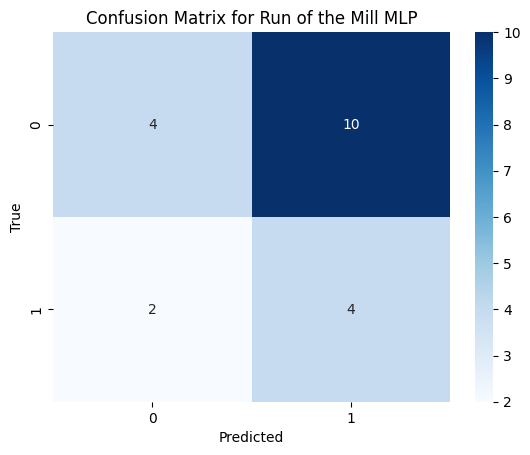

Mean predicted probability for dogs (Run of the Mill MLP): 0.7359156
Mean predicted probability for cats (Run of the Mill MLP): 0.7171364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Confusion Matrix for Single Convolutional Layer:


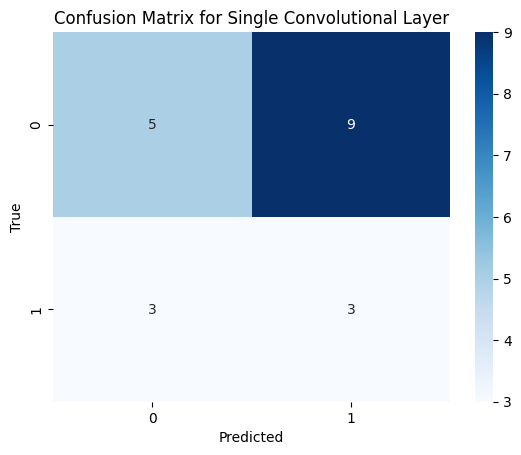

Mean predicted probability for dogs (Single Convolutional Layer): 0.62896556
Mean predicted probability for cats (Single Convolutional Layer): 0.48445514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
Confusion Matrix for Bigger Convolutional Model:


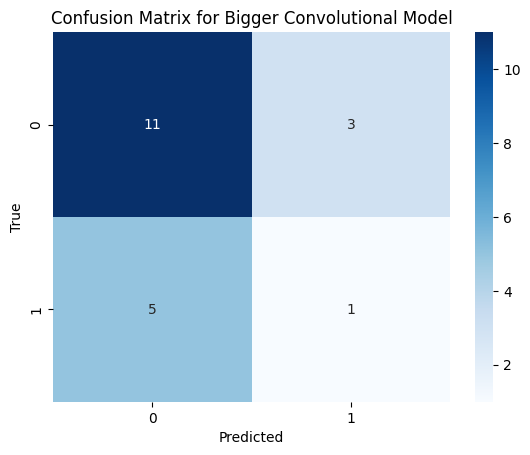

Mean predicted probability for dogs (Bigger Convolutional Model): 0.23010874
Mean predicted probability for cats (Bigger Convolutional Model): 0.16693902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Confusion Matrix for Huge Model:


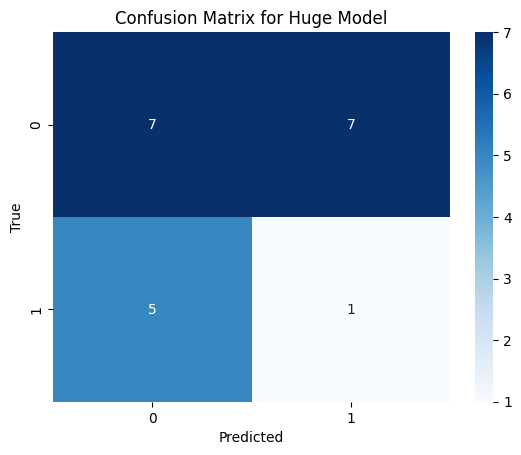

Mean predicted probability for dogs (Huge Model): 0.61607116
Mean predicted probability for cats (Huge Model): 0.427151


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to evaluate the model
def evaluate_model(model, x_valid, labels_valid, model_name="Model"):
    # Predict probabilities
    preds = model.predict(x_valid)
    binary_preds = (preds > 0.5).astype(int)

    # Calculate the confusion matrix
    cm = confusion_matrix(labels_valid, binary_preds)
    print(f"Confusion Matrix for {model_name}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Analyze predictions
    print(f"Mean predicted probability for dogs ({model_name}):", preds[labels_valid == 0].mean())
    print(f"Mean predicted probability for cats ({model_name}):", preds[labels_valid == 1].mean())

# Evaluate each model
evaluate_model(model_mlp, x_valid, labels_valid, "Run of the Mill MLP")
evaluate_model(model_single_conv, x_valid, labels_valid, "Single Convolutional Layer")
evaluate_model(model_bigger, x_valid, labels_valid, "Bigger Convolutional Model")
evaluate_model(model_huge, x_valid, labels_valid, "Huge Model")
